Cargar el dataset FuelConsumptionCo2.csv en numpy

lo habitual es cargarlo con pandas

## CARGA DE DATOS

* pickle.load
* numpy.genfromtxt

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import pickle as pkl

In [2]:
with open("../Data/FUELCONSUMPTION_CITY.pkl", "br") as f:
    city_consumption = pkl.load(f)
    
city_consumption

array([ 9.9, 11.2,  6. , ..., 13.4, 12.9, 14.9])

In [3]:
print(city_consumption.dtype)

float64


In [4]:

# Cargamos la columna 8 del CSV en un array de numpy: es la columna de consumo de combustible por ciudad
# city_consumption = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(8), delimiter=",", skip_header=1) # float64
city_consumption = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(8), delimiter=",", skip_header=1, dtype=np.float32)
road_consumption = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(9), delimiter=",", skip_header=1, dtype=np.float32)
manufacturers = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(1), delimiter=",", skip_header=1, dtype=str)

In [5]:
print(city_consumption.dtype)
print(city_consumption.shape)

float32
(1067,)


In [6]:
manufacturers

array(['ACURA', 'ACURA', 'ACURA', ..., 'VOLVO', 'VOLVO', 'VOLVO'],
      dtype='<U13')

In [7]:
print(manufacturers.dtype)
print(manufacturers.shape)

<U13
(1067,)


## MEDIA

In [8]:
print(f"Consumo medio en ciudad: {np.mean(city_consumption)}")
print(f"Consumo medio en carretera: {np.mean(road_consumption)}")
# print(f"Consumo medio en ciudad: {np.around(np.mean(city_consumption), 2):.2f}")
# print(f"Consumo medio en ciudad: {round(np.mean(city_consumption), 2):.2f}")

Consumo medio en ciudad: 13.29653263092041
Consumo medio en carretera: 9.474601745605469


## MEDIANA

In [9]:
print(f"Mediana de combustible en ciudad: {np.median(city_consumption)}")
print(f"Mediana de combustible en carretera: {np.median(road_consumption)}")

Mediana de combustible en ciudad: 12.600000381469727
Mediana de combustible en carretera: 8.800000190734863


## MÁXIMO Y MÍNIMO

In [10]:
print(f"Coche que más consume en ciudad: {np.max(city_consumption)}")
print(f"Coche que más consume en carretera: {np.max(road_consumption)}")

Coche que más consume en ciudad: 30.200000762939453
Coche que más consume en carretera: 20.5


In [11]:
print(f"Coche que menos consume en ciudad: {np.min(city_consumption)}")
print(f"Coche que menos consume en carretera : {np.min(road_consumption)}")

Coche que menos consume en ciudad: 4.599999904632568
Coche que menos consume en carretera : 4.900000095367432


## HISTOGRAMA

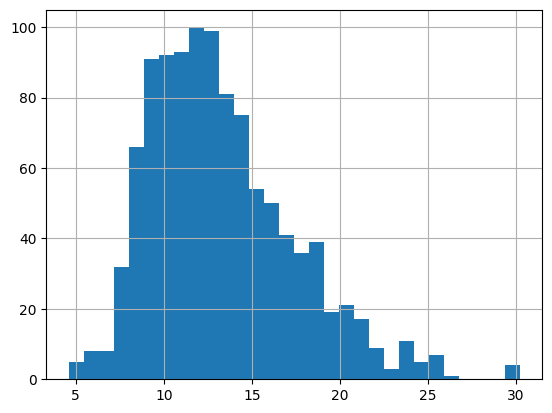

In [12]:
plt.hist(city_consumption, bins=30)

plt.grid()

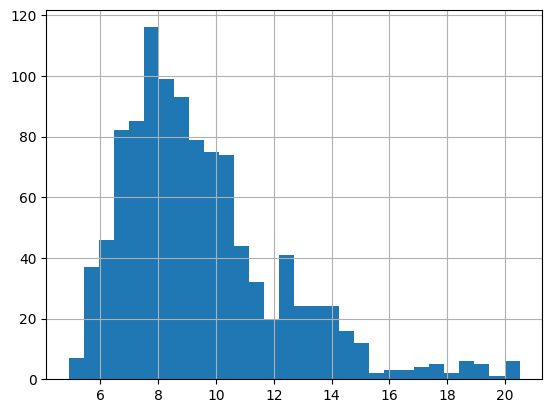

In [13]:
plt.hist(road_consumption, bins=30)
plt.grid()

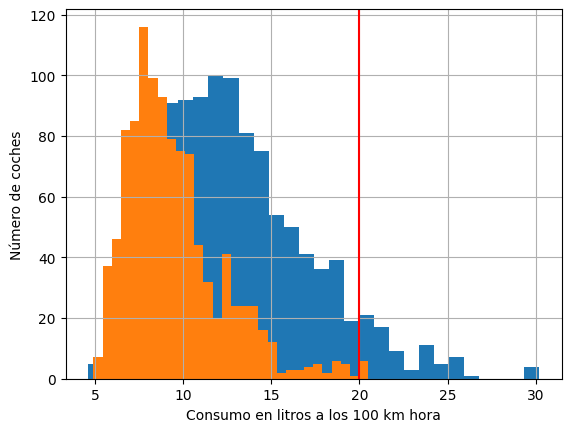

In [14]:
# superponer los gráficos
plt.hist(city_consumption, bins=30)
plt.hist(road_consumption, bins=30)
plt.xlabel("Consumo en litros a los 100 km hora")
plt.ylabel("Número de coches")
plt.axvline(20, color='red') # Limite de compra
plt.grid()

## CUARTILES

* Q1 25 %
* Q2 50 % (mediana)
* Q3 75 %

In [15]:
print(np.quantile(a = city_consumption, q = 0.5, interpolation = "lower"))
print(np.median(city_consumption))

12.6
12.6


In [16]:
print(np.quantile(a = city_consumption, q = [0.25, 0.50, 0.75], interpolation = "lower"))
# primer cuartil (Q1): 10,2 L/ 100 km - El 25 % de los coches consumen menos de 10,2 litros
# Mediana (Q2): 12,6 L / 100 km - El 50 % de los coches consumen menos de 12,6 litros
# Tercer cuartil (Q3): 15,5 L / 100 km - El 75 % consumen menos de 15,5 litros
# Esto nos interesa para poder detectar valores anómalos o que están muy alejados del 50 % central de los datos.

[10.2 12.6 15.5]


In [17]:


# numeros = [0.10 ,0.20, 0.30 ,0.40, 0.50]
# for i in numeros:
#    percentage = np.quantile(a = city_consumption, q = i, interpolation = "lower")
#    if percentage >= 8:
#        break
    

In [18]:
# Filtros: máscara booleana
city_consumption[city_consumption >= 26]
# df[df["city_consumption"] >= 26]

array([30. , 30.2, 26.7, 30. , 30.2], dtype=float32)

In [19]:
# rango 
print(f"Rango consumo ciudad: {np.max(city_consumption) - np.min(city_consumption)}")
print(f"Rango consumo carretera: {np.max(road_consumption) - np.min(road_consumption)}")

Rango consumo ciudad: 25.600000381469727
Rango consumo carretera: 15.600000381469727


## IQR

* Q3 - Q1 

Nos puede servir para filtrar outliers / atípicos.

In [20]:
# rango intercuartílico IQR: amplitud entre el primer cuartil (Q1) y el tercer cuartil (Q3): variabilidad central de los datos
# lo usaremos para calcular valores que sean anómalos, que están muy alejados de ese 50 % central de los datos
# cómo están distribuidos alrededor de la mediana
# 1.5 veces el IQR alejado se puede considerar un outlier o valor anómalo

Q1 = np.quantile(a = city_consumption, q = 0.25, interpolation = "lower")
Q3 = np.quantile(a = city_consumption, q = 0.75, interpolation = "lower")

IQR = Q3 - Q1
print(IQR)

# def remove_outliers(array):

5.3


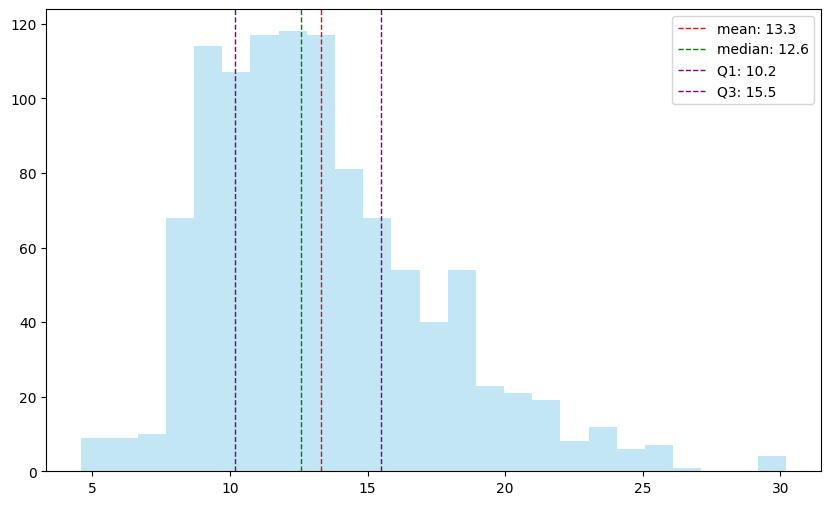

In [21]:
# pintar media, mediana, q1, q3, min, max en un histograma
city_mean = np.mean(city_consumption)
city_median = np.median(city_consumption)
city_min = np.min(city_consumption)
city_max = np.max(city_consumption)
city_q1 = np.quantile(a = city_consumption, q = 0.25, interpolation = "lower")
city_q3 = np.quantile(a = city_consumption, q = 0.75, interpolation = "lower")

plt.figure(figsize=(10, 6))
plt.hist(city_consumption, bins=25, color='skyblue', alpha=0.5)
plt.axvline(city_mean, color='red', linestyle='dashed', linewidth=1, label=f'mean: {city_mean:.1f}')
plt.axvline(city_median, color='green', linestyle='dashed', linewidth=1, label=f'median: {city_median:.1f}')
# plt.axvline(city_min, color='orange', linestyle='dashed', linewidth=1, label=f'min: {city_min:.1f}')
# plt.axvline(city_max, color='orange', linestyle='dashed', linewidth=1, label=f'max: {city_max:.1f}')
plt.axvline(city_q1, color='purple', linestyle='dashed', linewidth=1, label=f'Q1: {city_q1:.1f}')
plt.axvline(city_q3, color='purple', linestyle='dashed', linewidth=1, label=f'Q3: {city_q3:.1f}')
# plt.grid()
plt.legend(loc=0) # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
plt.show()

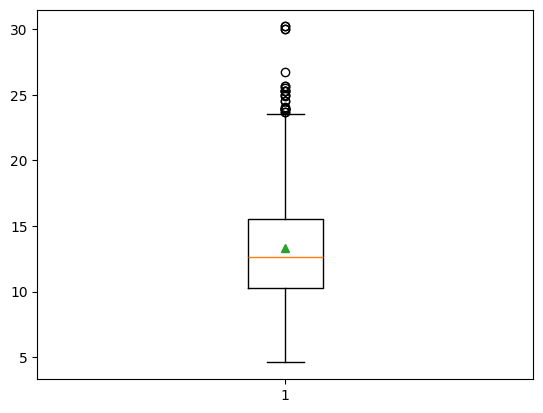

In [22]:
# punto y coma para evitar que muestre textos encima del gráfico, solo cuando es la última línea de la celda
# calcula y muestra la mediana, la media, rango IQR
# los puntos negros serían valores anómalos, outliers
plt.boxplot(city_consumption, showmeans=True);

## FILTRAR DATOS

In [23]:
# Filtrar usando percentiles
# print(np.quantile(city_consumption, 0.5))
# print(np.percentile(city_consumption, 50))

percentil_10 = np.percentile(city_consumption, 10)
percentil_90 = np.percentile(city_consumption, 90)
print(f"percentil 10: {percentil_10}")
print(f"percentil 90: {percentil_90}")

#Coches en el 10 % inferior (10 % de coches que menos consumen)
coches_menor_consumo = city_consumption[city_consumption <= percentil_10]

# 10 % coches que más consumen
coches_mayor_consumo = city_consumption[city_consumption >= percentil_90]

print("10 % coches menor consumo")
# print(coches_menor_consumo.shape)
print(f"media: {np.mean(coches_menor_consumo)}")
print("10 % coches mayor consumo")
# print(coches_mayor_consumo.shape)
print(f"media: {np.mean(coches_mayor_consumo)}")

percentil 10: 8.699999809265137
percentil 90: 18.799999237060547
10 % coches menor consumo
media: 7.8307013511657715
10 % coches mayor consumo
media: 21.574783325195312


## DISPERSIÓN

* Se usa normalmente la desviación estándar: std

In [24]:
# # Varianza: mide la dispersión de los consumos con rescpecto a la media
np.var(city_consumption)

np.float32(16.804516)

In [25]:
# desciación estándar: raíz cuadrada de la varianza, permite una mejor interpretación ya que estaría en las mismas unidades con las que estamos trabajando
np.std(city_consumption)
# de media, los consumos se desvían 4,1 Litros de la media


np.float32(4.0993314)

In [26]:
manufacturers

array(['ACURA', 'ACURA', 'ACURA', ..., 'VOLVO', 'VOLVO', 'VOLVO'],
      dtype='<U13')

## MODA

In [27]:
from collections import Counter
contador = Counter(manufacturers)
contador.items()

# 10 mas frecuentes
contador.most_common(10)

# 10 menos frecuentes
manufaturers_sorted = sorted(contador.items(), key=lambda item: item[1])
manufaturers_sorted[:10]
# 10 mas frecuentes:
# manufaturers_sorted = sorted(contador.items(), key=lambda item: item[1], reverse=True)

[(np.str_('SMART'), 2),
 (np.str_('SRT'), 2),
 (np.str_('LAMBORGHINI'), 3),
 (np.str_('MASERATI'), 6),
 (np.str_('ASTON MARTIN'), 7),
 (np.str_('ROLLS-ROYCE'), 7),
 (np.str_('BENTLEY'), 8),
 (np.str_('SCION'), 9),
 (np.str_('FIAT'), 10),
 (np.str_('LINCOLN'), 11)]

In [28]:
for position, vehicle in enumerate(contador.items()):
    
    if 20 > position > 10:
        print(f"{vehicle[0]} {vehicle[1]}")

FORD 90
GMC 49
HONDA 21
HYUNDAI 24
INFINITI 21
JAGUAR 22
JEEP 31
KIA 33
LAMBORGHINI 3


In [29]:


# Mostrar los 5 fabricantes que más coches tienen en este dataset
top_10 = contador.most_common(10)
for fabricante, count in top_10:
    print(f"Fabricante {fabricante} tiene {count} coches")

Fabricante FORD tiene 90 coches
Fabricante CHEVROLET tiene 86 coches
Fabricante BMW tiene 64 coches
Fabricante MERCEDES-BENZ tiene 59 coches
Fabricante AUDI tiene 49 coches
Fabricante GMC tiene 49 coches
Fabricante TOYOTA tiene 49 coches
Fabricante PORSCHE tiene 44 coches
Fabricante VOLKSWAGEN tiene 42 coches
Fabricante DODGE tiene 39 coches


In [30]:
top_10

[(np.str_('FORD'), 90),
 (np.str_('CHEVROLET'), 86),
 (np.str_('BMW'), 64),
 (np.str_('MERCEDES-BENZ'), 59),
 (np.str_('AUDI'), 49),
 (np.str_('GMC'), 49),
 (np.str_('TOYOTA'), 49),
 (np.str_('PORSCHE'), 44),
 (np.str_('VOLKSWAGEN'), 42),
 (np.str_('DODGE'), 39)]

In [31]:
fabricantes, conteos =  zip(*top_10) # se puede con un for guardando en dos listas independientes

print(fabricantes)
print(conteos)

(np.str_('FORD'), np.str_('CHEVROLET'), np.str_('BMW'), np.str_('MERCEDES-BENZ'), np.str_('AUDI'), np.str_('GMC'), np.str_('TOYOTA'), np.str_('PORSCHE'), np.str_('VOLKSWAGEN'), np.str_('DODGE'))
(90, 86, 64, 59, 49, 49, 49, 44, 42, 39)


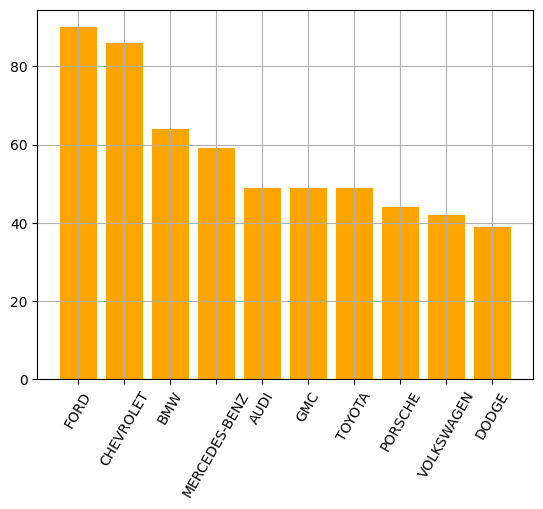

In [32]:
# plt.figure(figsize=(12, 8))
plt.bar(fabricantes, conteos, color='orange')
plt.xticks(rotation=60)
plt.grid()

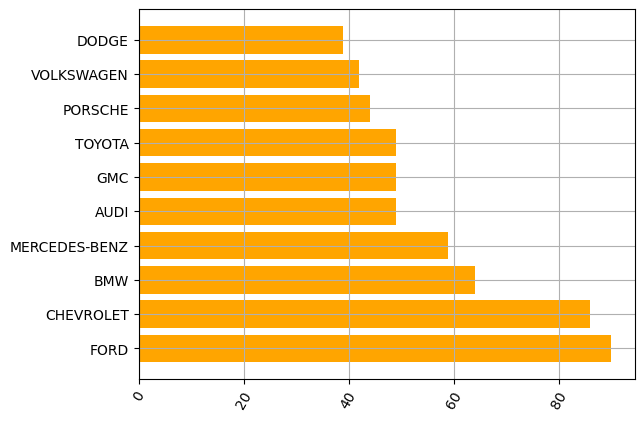

In [33]:
plt.barh(fabricantes, conteos, color='orange')
plt.xticks(rotation=60)
plt.grid()

In [34]:
conteos

(90, 86, 64, 59, 49, 49, 49, 44, 42, 39)

In [35]:
# TODO moda de cilindros

## FILTRO OUTLIERS CON IQR

In [36]:
# metodo para ver outliers

def filtrar_outliers(array, k=1.5):
    # array_copy = array.copy()
    # calcular el Q1
    Q1 = np.percentile(array, 25)
    # calcular el Q3
    Q3 = np.percentile(array, 75)
    # calcular IQR
    IQR = Q3 - Q1
    # Calcular limites inferior y superior: 1.5 veces el IQR
    limite_inferior = Q1 - IQR * k
    print(f"limite inferior {limite_inferior}")

    limite_superior = Q3 + IQR * k
    print(f"limite superior {limite_superior}")

    # Filtro sobre array de 1.5 veces el IQR para límite inferior y límite superior
    # nos quedamos solo con lo que está entre el límite inferior y el límite superior
    array_sin_outliers = array[(array >= limite_inferior) & (array <= limite_superior)]
    return array_sin_outliers

In [37]:
# array_sin_outliers = filtrar_outliers(city_consumption)
city_consumption_no_outliers = filtrar_outliers(city_consumption, k=1.5)
print(city_consumption.shape) # 1067
print(city_consumption_no_outliers.shape) # 1041

limite inferior 2.299999713897705
limite superior 23.5
(1067,)
(1041,)


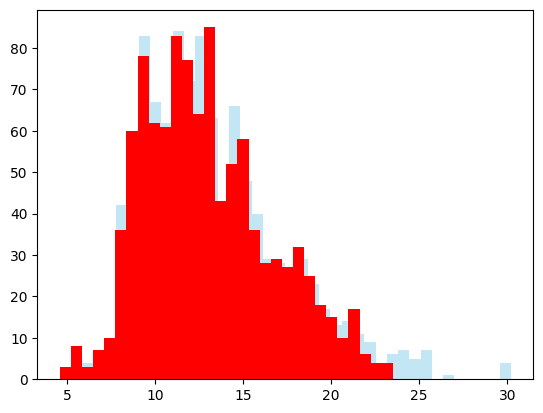

In [38]:
plt.hist(city_consumption, bins = 40, color = "skyblue", alpha=0.5)
plt.hist(city_consumption_no_outliers, bins = 30, color = "red");

el city_consumption tenemos más datos que en city_consumption_no_outliers, por lo que al pintarlos en un histograma las frecuencias de aparacición son diferentes porque se calculan sobre el total.

Trabaja con frecuencias de aparición.

## VISTAS VS. COPIAS

In [39]:
# VISTAS: REFERENCIAS AL MISMO ARRAY ORIGINAL POR LO QUE MODIFICAS UNA VISTA MODIFICAS EL ARRAY ORIGINAL:
# crear una vista:
array = np.array([1, 2, 3, 4, 5])
vista = array[:2] # sclicing, devuelve una vista, apunta al mismo array no es una copia
print(f"array: {array}")
print(f"array: {vista}")

vista[0] = 666 # modificamos la vista y se modifica el array
print(f"array: {array}") # ha sido modificado
print(f"array: {vista}") # ha sido modificado

array: [1 2 3 4 5]
array: [1 2]
array: [666   2   3   4   5]
array: [666   2]


In [40]:
# COPIA DE UN ARRAY, SI LO MODIFICO, NO MODIFICA EL ARRAY ORIGINAL
# filtro de máscara booleana
array = np.array([10, 20, 30, 40, 50])
array_filtrado = array[(array >= 15) & (array <= 45)] # crea una copia, NO una vista

print(f"array: {array}")
print(f"array_filtrado: {array_filtrado}")

array_filtrado[0] = 666 # modificar la copia, no afecta al original
print(f"array: {array}")
print(f"array_filtrado: {array_filtrado}") # Vemos que solo modifica la copia, y no el original

array: [10 20 30 40 50]
array_filtrado: [20 30 40]
array: [10 20 30 40 50]
array_filtrado: [666  30  40]


In [41]:
array = np.array([10, 20, 30, 40, 50])
array_copia = array.copy() # crea una copia, NO una vista

print(f"array: {array}")
print(f"array_copia: {array_copia}")

array_copia[0] = 666 # modificar la copia, no afecta al original
print(f"array: {array}")
print(f"array_filtrado: {array_copia}") # Vemos que solo modifica la copia, y no el original

array: [10 20 30 40 50]
array_copia: [10 20 30 40 50]
array: [10 20 30 40 50]
array_filtrado: [666  20  30  40  50]


* Cuando operaciones en un array, como el slicing, devuelve una vista, hay que tener cuidado porque si modificas la vista esto afecta al array original y podemos perder los datos originales.

* Cuando hacemos otras operaciones como filtrado, se genera una copia, y no hay problema en modificarla porque no afecta al array original.

## CORRELACIÓN

In [42]:
city_consumption = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(8), delimiter=",", skip_header=1,)
road_consumption = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(9), delimiter=",", skip_header=1,)
co2_emissions = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(12), delimiter=",", skip_header=1,)
engine_cc = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(4), delimiter=",", skip_header=1,)
cylinders = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(5), delimiter=",", skip_header=1, dtype=np.int8)

print(co2_emissions)
print(engine_cc)
print(cylinders)

[196. 221. 136. ... 271. 260. 294.]
[2.  2.4 1.5 ... 3.  3.2 3.2]
[4 4 4 ... 6 6 6]


In [43]:
stats.pearsonr(cylinders, city_consumption)[0]

np.float64(0.7964726538688851)

* 1: correlación positiva
* 0: no hay correlación
* -1: correlación negativa

0,79 lo interpretaríamos como que hay una correlación positiva entre cilindros y consumo de combustible en ciudad. Es decir, que cuántos más cilindros mayor consumo.

In [44]:
# calcular todas las correlaciones para la columna cylinders
print(f" cylinders / cylinders {stats.pearsonr(cylinders, cylinders)[0]}") # 1 porque es la misma variable
print(f" cylinders / city_consumption {stats.pearsonr(cylinders, city_consumption)[0]}") 
print(f" cylinders / road_consumption {stats.pearsonr(cylinders, road_consumption)[0]}") 
print(f" cylinders / engine_cc {stats.pearsonr(cylinders, engine_cc)[0]}") 
print(f" cylinders / co2_emissions {stats.pearsonr(cylinders, co2_emissions)[0]}") 

 cylinders / cylinders 1.0
 cylinders / city_consumption 0.7964726538688851
 cylinders / road_consumption 0.7245935500546529
 cylinders / engine_cc 0.9340105318978434
 cylinders / co2_emissions 0.8496845920141145


In [45]:
print(f" co2_emissions / cylinders {stats.pearsonr(co2_emissions, cylinders)[0]}") 
print(f" co2_emissions / city_consumption {stats.pearsonr(co2_emissions, city_consumption)[0]}") 
print(f" co2_emissions / road_consumption {stats.pearsonr(co2_emissions, road_consumption)[0]}") 
print(f" co2_emissions / engine_cc {stats.pearsonr(co2_emissions, engine_cc)[0]}") 
print(f" co2_emissions / co2_emissions {stats.pearsonr(co2_emissions, co2_emissions)[0]}")  # 1 porque es la misma variable

 co2_emissions / cylinders 0.8496845920141145
 co2_emissions / city_consumption 0.8980385119353927
 co2_emissions / road_consumption 0.8617479448970435
 co2_emissions / engine_cc 0.8741543683958123
 co2_emissions / co2_emissions 1.0


In [46]:
columnas = [engine_cc, city_consumption, road_consumption, cylinders, co2_emissions] # 5 columnas del CSV

matriz_lista = list()

for columna1 in columnas:
    fila = list()
    for columna2 in columnas:
        fila.append(stats.pearsonr(columna1, columna2)[0])
    
    matriz_lista.append(fila)
    
matriz = np.array(matriz_lista)
print(matriz)

[[1.         0.83222499 0.77874579 0.93401053 0.87415437]
 [0.83222499 1.         0.96571822 0.79647265 0.89803851]
 [0.77874579 0.96571822 1.         0.72459355 0.86174794]
 [0.93401053 0.79647265 0.72459355 1.         0.84968459]
 [0.87415437 0.89803851 0.86174794 0.84968459 1.        ]]


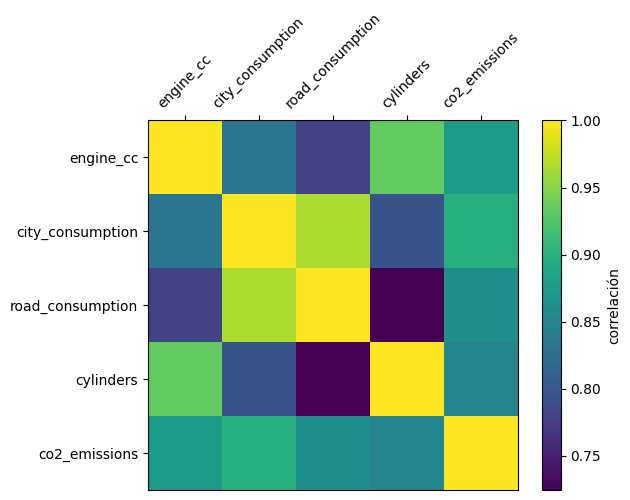

In [47]:
column_names = ['engine_cc', 'city_consumption', 'road_consumption', 'cylinders', 'co2_emissions']
plt.imshow(matriz, cmap='viridis')
# plt.imshow(matriz, cmap='viridis', vmin=-1, vmax=1)
plt.colorbar(label='correlación')
plt.xticks(range(len(column_names)), column_names, rotation=45)
plt.yticks(range(len(column_names)), column_names)
plt.gca().xaxis.set_ticks_position('top')

<Axes: >

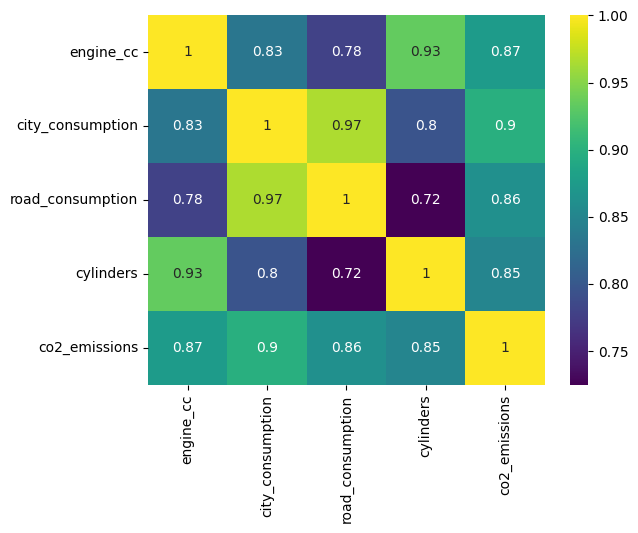

In [48]:
# pip install seaborn
import seaborn as sns
# plt.figure(figsize= (10,8))
sns.heatmap(matriz, annot=True, cmap='viridis', xticklabels=column_names, yticklabels=column_names)

## ESTANDARIZACIÓN

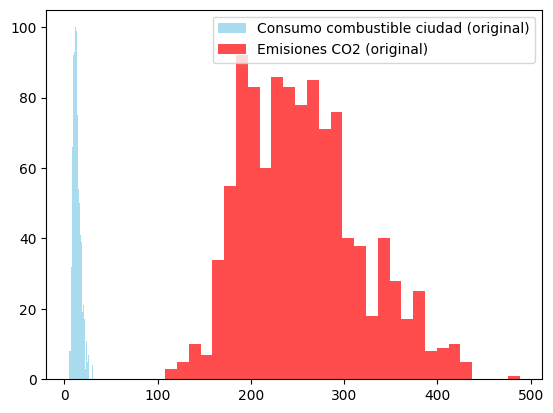

In [49]:
# plt.figure(figsize=(12,10))
plt.hist(city_consumption, bins=30, color="skyblue", alpha=0.7, label="Consumo combustible ciudad (original)")
plt.hist(co2_emissions, bins=30, color="red",  alpha=0.7, label="Emisiones CO2 (original)")
plt.legend();

In [50]:
# estandarizar y volver a pintar el histograma
mean_city_consumption = np.mean(city_consumption)
mean_co2_emissions = np.mean(co2_emissions)

median_city_consumption = np.median(city_consumption)
median_co2_emissions = np.median(co2_emissions)

std_city_consumption = np.std(city_consumption)
std_co2_emissions = np.std(co2_emissions)

print(f"Media original city_consumption: {mean_city_consumption}")
print(f"Mediana original city_consumption: {median_city_consumption}")
print(f"Desviación estandar original city_consumption: {std_city_consumption}")

print(f"Media original co2_emissions: {mean_co2_emissions}")
print(f"Mediana original co2_emissions: {median_co2_emissions}")
print(f"Desviación estandar original co2_emissions: {std_co2_emissions}")


Media original city_consumption: 13.296532333645736
Mediana original city_consumption: 12.6
Desviación estandar original city_consumption: 4.099331004651009
Media original co2_emissions: 256.2286785379569
Mediana original co2_emissions: 251.0
Desviación estandar original co2_emissions: 63.34260099404252


In [51]:
city_consumption_standard = (city_consumption - mean_city_consumption) / std_city_consumption
co2_emissions_standard = (co2_emissions - mean_co2_emissions) / std_co2_emissions

print(city_consumption_standard[:5])
print(co2_emissions_standard[:5])

[-0.82855772 -0.5114328  -1.77993246 -0.14551944 -0.29188478]
[-0.95084    -0.55616091 -1.89806981 -0.01939735 -0.19305615]


In [52]:
# estandarizar y volver a pintar el histograma
mean_city_consumption = np.mean(city_consumption_standard)
mean_co2_emissions = np.mean(co2_emissions_standard)

median_city_consumption = np.median(city_consumption_standard)
median_co2_emissions = np.median(co2_emissions_standard)

std_city_consumption = np.std(city_consumption_standard)
std_co2_emissions = np.std(co2_emissions_standard)

print(f"Media estandarizado city_consumption: {mean_city_consumption}")
print(f"Mediana estandarizado city_consumption: {median_city_consumption}")
print(f"Desviación estandar estandarizado city_consumption: {std_city_consumption}")

print(f"Media estandarizado co2_emissions: {mean_co2_emissions}")
print(f"Mediana estandarizado co2_emissions: {median_co2_emissions}")
print(f"Desviación estandar estandarizado co2_emissions: {std_co2_emissions}")


Media estandarizado city_consumption: -5.327405703918277e-17
Mediana estandarizado city_consumption: -0.1699136597789899
Desviación estandar estandarizado city_consumption: 1.0000000000000002
Media estandarizado co2_emissions: -3.196443422350966e-16
Mediana estandarizado co2_emissions: -0.08254600309906245
Desviación estandar estandarizado co2_emissions: 1.0


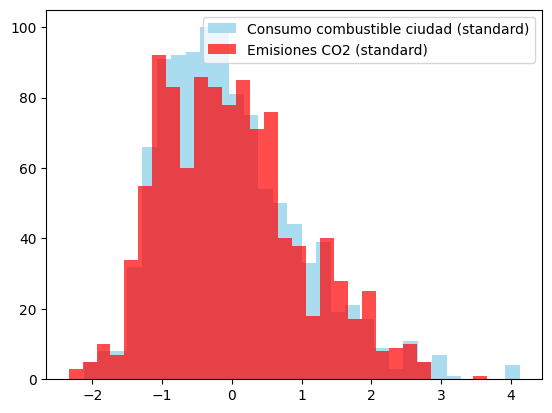

In [53]:
plt.hist(city_consumption_standard, bins=30, color="skyblue", alpha=0.7, label="Consumo combustible ciudad (standard)")
plt.hist(co2_emissions_standard, bins=30, color="red",  alpha=0.7, label="Emisiones CO2 (standard)")
plt.legend();

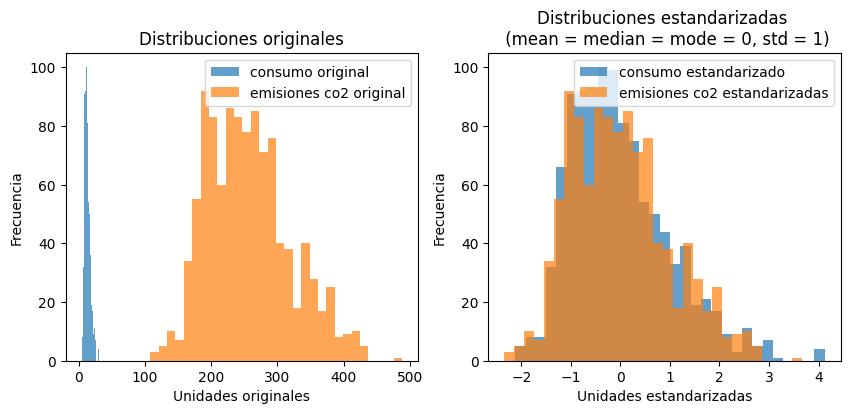

In [54]:
# opcional: mostrar los dos gráficos juntos
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1) # Primer gráfico
plt.hist(city_consumption, bins=30, alpha=0.7, label='consumo original')
plt.hist(co2_emissions, bins=30, alpha=0.7, label='emisiones co2 original')
plt.title("Distribuciones originales")
plt.xlabel("Unidades originales")
plt.ylabel("Frecuencia")
plt.legend()

plt.subplot(1, 2, 2) # Segundo gráfico
plt.hist(city_consumption_standard, bins=30, alpha=0.7, label='consumo estandarizado')
plt.hist(co2_emissions_standard, bins=30, alpha=0.7, label='emisiones co2 estandarizadas')
plt.title("Distribuciones estandarizadas \n (mean = median = mode = 0, std = 1)")
plt.xlabel("Unidades estandarizadas")
plt.ylabel("Frecuencia")
plt.legend();

## ASIMETRÍA Y CURTOSIS

In [57]:
# coeficiente de asimetría (skewness)

print(f"Coeficiente de asimetría city_consumption: {stats.skew(city_consumption)}")
print(f"Coeficiente de asimetría co2_emissions: {stats.skew(co2_emissions)}")

Coeficiente de asimetría city_consumption: 0.8993623042454025
Coeficiente de asimetría co2_emissions: 0.5187840084529483


Interpretación:

* Cercano a 0 es que no hay asimetría, es decir, que la distribución es simétrica, OK.
* Si es positivo o negativo formará una cola

In [58]:
# curtosis:
print(f"Curtosis city_consumption: {stats.kurtosis(city_consumption)}")
print(f"Curtosis co2_emissions: {stats.kurtosis(co2_emissions)}")

Curtosis city_consumption: 0.9413416946375341
Curtosis co2_emissions: -0.11465840677682548


Interpretación:

1. Leptocúrtica ($k_3 > 0$): Decaimiento rápido, cola ligera.
2. Mesocúrtica ($k_3=0$): Curva normal.
3. Paticúrtica ($k_3<0$ ): Decaimiento lento.



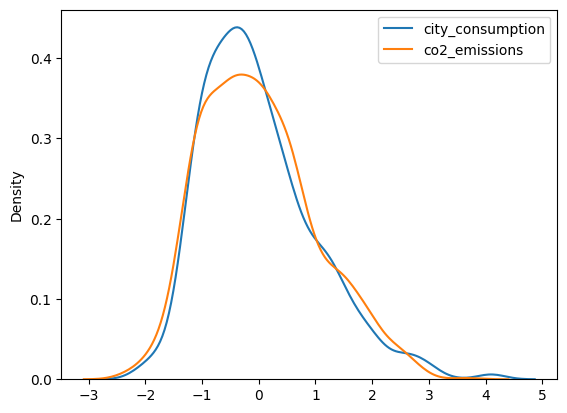

In [63]:
sns.kdeplot(city_consumption_standard, label="city_consumption")
sns.kdeplot(co2_emissions_standard, label='co2_emissions')
plt.legend();

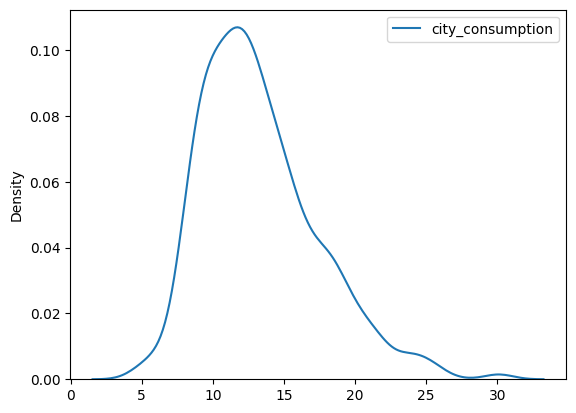

In [64]:
sns.kdeplot(city_consumption, label="city_consumption")
plt.legend();

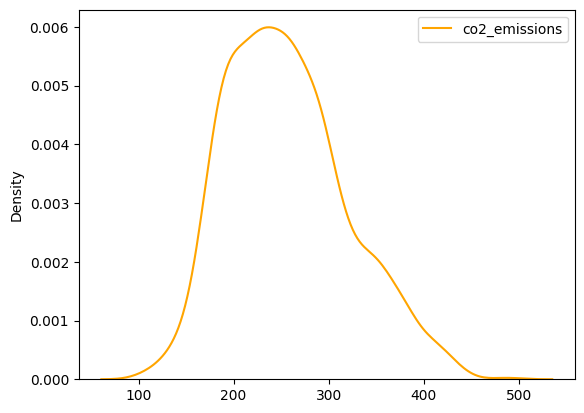

In [ ]:
sns.kdeplot(co2_emissions, label="co2_emissions", color='orange')
# plt.plot(co2_emissions, label="co2_emissions", color='orange') # este no serviría para pintar el histograma en curva
plt.legend();

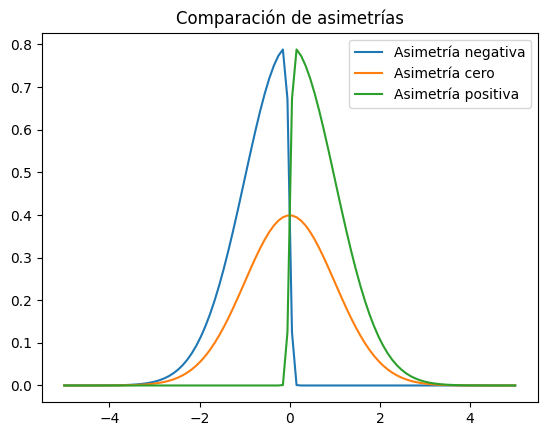

In [73]:
# ilustrar asimetría negativa, cero y positiva:
# opcional
# generar datos ficticios
from scipy.stats import skewnorm

x = np.linspace(-5, 5, 100)

negative_skew = skewnorm.pdf(x, a=-20) # a < 0 para asimetría negativa
zero_skew = skewnorm.pdf(x, a=0) # a = 0 para simetría perfecta
positive_skew = skewnorm.pdf(x, a=20) # a > 0 para asimetría positiva

plt.plot(x, negative_skew, label='Asimetría negativa')
plt.plot(x, zero_skew, label='Asimetría cero') # campana de gauss
plt.plot(x, positive_skew, label='Asimetría positiva')
plt.legend()
plt.title("Comparación de asimetrías");

Text(0.5, 1.0, 'Curtosis')

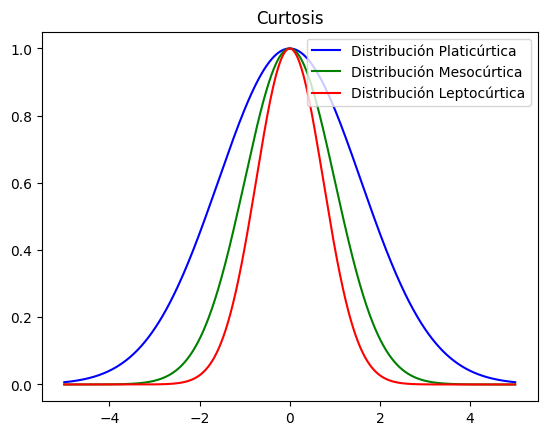

In [72]:
# ilustrar curtosis negativa, cero y positiva con datos ficticios

x = np.linspace(-5, 5, 1000)

platicurtic = np.exp(-0.2 * x**2) # más aplanada (Menor que cero)
mesocurtic = np.exp(-0.5 * x**2) # estandar (0)
leptocurtic = np.exp(-0.9 * x**2) # más alta, en pico (Mayor que cero)

plt.plot(x, platicurtic, color="blue", label="Distribución Platicúrtica")
plt.plot(x, mesocurtic, color="green", label="Distribución Mesocúrtica")
plt.plot(x, leptocurtic, color="red", label="Distribución Leptocúrtica")
plt.legend()
plt.title("Curtosis")

## TRANSFORMAR DISTRIBUCIONES DE DATOS

Mitigar, reducir asimetría e impacto de outliers.

* np.sqrt (suave)
* np.log (fuerte)

In [75]:
# Transformación de datos: no se trata de escalar datos, se trata de alterar su forma atenuando el impacto de los valores outliers

# Función Raíz: más suave que la logarítmica , ayuda a reducir la asimetría, pero en menor medida que la logarítmica
city_consumption_sqrt = np.sqrt(city_consumption)
co2_emissions_sqrt = np.sqrt(co2_emissions)

# Función logaritmo: comprime las diferencias entre valores grandes y valores pequeños, es más fuerte que la de la raíz
city_consumption_log = np.log(city_consumption)
co2_emissions_log = np.log(co2_emissions)

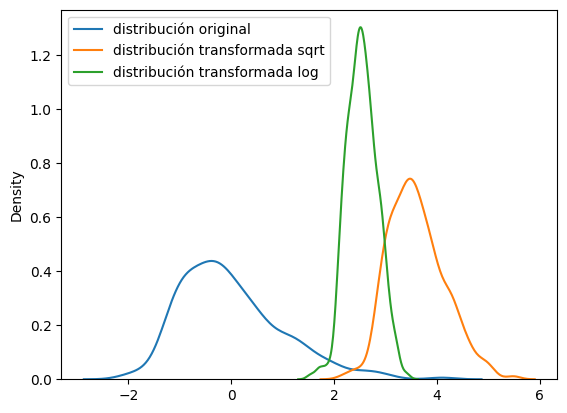

In [82]:
sns.kdeplot(city_consumption_standard, label="distribución original") # tienen la distribución original
sns.kdeplot(city_consumption_sqrt, label="distribución transformada sqrt") # se corrige el impacto de los outliers
sns.kdeplot(city_consumption_log, label="distribución transformada log") # se corrige el impacto de los outliers
plt.legend();

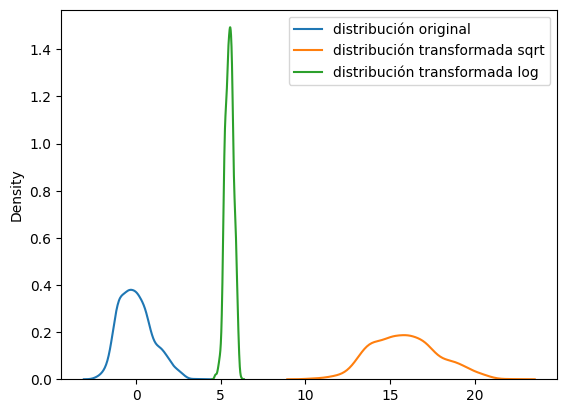

In [83]:
sns.kdeplot(co2_emissions_standard, label="distribución original") # tienen la distribución original
sns.kdeplot(co2_emissions_sqrt, label="distribución transformada sqrt") # se corrige el impacto de los outliers
sns.kdeplot(co2_emissions_log, label="distribución transformada log") # se corrige el impacto de los outliers
plt.legend();

* **Estandarización** los datos no cambian solo se colocan en una escala entorno al 0 para compararlos con otros datos. Pero la distribución original se mantiene, es decir, si hay asimetría la seguirá habiendo, no la corrige.

* **Transformación de distribución de datos**: Para corregir la asimetría se usa una función matemática, que puede ser la raíz, o logaritmo. Esto sí cambia la distribución porque compacta los valores, mitigando el impacto de los outliers.

Normalmente queremos hacer primero una transformación de la distribución para eliminar la asimetría y luego aplicar una estandarización para poder poner datos en una escala que se puedan comparar con otros.

Este método tiene la ventaja de que no requiere eliminar outliers, ya que los compacta y mitiga su impacto. Tiene la ventaja de que no elimina datos. El otro método de tratar outliers de Tukey sí elimina datos outliers y no quita asimetría.


## CONTRASTE DE HIPÓTESIS

Ejercicio 12:

- Realiza un contraste de hipótesis y comprueba si se gasta más combustible en la ciudad que en la autovía.
    - **fuel_city**: gasto en ciudad
    - **fuel_hwy**: gasto en autovía
    - $H_0$: el gasto de combustible en la ciudad es igual o menor al gasto en la autovía.
    - $H_1$: el gasto de combustible en la ciudad es mayor al gasto en la autovía.
    
_**Pista**: hay que aplicar una prueba **t de Student** para **muestras pareadas** `stats.ttest_rel()`, o una prueba **Wilcoxon** para **muestras pareadas** `stats.wilcoxon()`, dependiendo de si se cumplen los supuestos de normalidad y homogeneidad de varianzas. Pueden especificar el parámetro `alternative` con el argumento `"greater"` para un contraste de tipo `a>b`._

Son pareadas porque ambos combustibles pertenecen al mismo coche por tanto en realidad son datos de la misma entidad, es decir, de una misma fila.

In [86]:
print(city_consumption[:5])
print(road_consumption[:5])

[ 9.9 11.2  6.  12.7 12.1]
[6.7 7.7 5.8 9.1 8.7]


In [85]:
# nivel de significancia para aceptar o rechazar pruebas
alpha = 0.05

In [87]:
# normalidad: combina skew y curtosis para saber si los datos tienen una distribución normal
_, p_city = stats.normaltest(city_consumption)
_, p_road = stats.normaltest(road_consumption)
# se puede añadir a mayores la prueba de stats.shapiro

print("pruebas de normalidad")
print(f"p_city {p_city} y p_road {p_road}")

pruebas de normalidad
p_city 6.448140852748941e-29 y p_road 1.7367717953636e-50


In [88]:
# homogeneidad de varianzas: es decir, que las varianza
# de city_consumption sea similar a la varianza de road_consumption
_, p_var = stats.levene(city_consumption, road_consumption)

print("prueba de varianza")
print(f"p_var {p_var}")

prueba de varianza
p_var 1.6747842967728482e-25


In [90]:
# comprobar valores p obtenidos versus significancia (a):
# and porque se deben cumplir todas
suposiciones = p_city > alpha and p_road > alpha and p_var > alpha
if suposiciones:
    print("Se cumple la asunción de NORMALIDAD Y HOMOGENEIDAD DE VARIANZAS")
else:
    print("NO se cumple la asunción de NORMALIDAD Y HOMOGENEIDAD DE VARIANZAS")    

NO se cumple la asunción de NORMALIDAD Y HOMOGENEIDAD DE VARIANZAS


In [92]:
print(f"mean_city_consumption {np.mean(city_consumption)}")
print(f"mean_road_consumption {np.mean(road_consumption)}")

mean_city_consumption 13.296532333645736
mean_road_consumption 9.474601686972822


In [95]:
# contraste de hipótesis:
if suposiciones:
    # prueba paramétrica
    _, p = stats.ttest_rel(city_consumption, road_consumption, alternative="greater")
else: 
    # prueba no parámetrica
    _, p = stats.wilcoxon(city_consumption, road_consumption, alternative="greater")

print(f"contraste de hipótesis p-value: {p}")

contraste de hipótesis p-value: 2.9678958260437154e-176


In [97]:
if p < alpha:
    print("H1 VERDADERO (H alternativa): El consumo en city es mayor que en road. RECHAZAMOS H0 (H Nula).")
else:
    print("H0 VERDADERO (H nula): El consumo en city es menor o igual que en road. RECHAZAMOS H1 (H alternativa).")

H1 VERDADERO (H alternativa): El consumo en city es mayor que en road. RECHAZAMOS H0 (H Nula).


Si p < a, la probabilidad de que el resultado sea H0 es tan pequeña que la rechazamos.

No significa que H1 sea absolutamente verdadero, sino que hay suficiente evidencia para preferir H1 en vez de H0.